In [1]:
import pandas as pd
import numpy as np

In [2]:
base_path = "../nanodiag_datasets/GSE175758/"
GSE175758_GEO_processed = base_path + "GSE175758_GEO_processed.txt"

In [219]:
df_GSE175758_GEO_processed = pd.read_csv(GSE175758_GEO_processed, sep="\t")

In [220]:
df_GSE175758_GEO_processed

,ID_REF,S01001.c1.blasts.d0,S01001.c1.blasts.d0.Detection.Pval,S01004.c1.blasts.d0,S01004.c1.blasts.d0.Detection.Pval,S01006.c1.blasts.d0,S01006.c1.blasts.d0.Detection.Pval,S01007.c1.blasts.d0,S01007.c1.blasts.d0.Detection.Pval,S01010.c1.blasts.d0,...,S01022.c2.blasts.d8,S01022.c2.blasts.d8.Detection.Pval,S01027.c2.blasts.d8,S01027.c2.blasts.d8.Detection.Pval,S01031.c2.blasts.d8,S01031.c2.blasts.d8.Detection.Pval,S01032.c2.blasts.d8,S01032.c2.blasts.d8.Detection.Pval,S01777.c2.blasts.d8,S01777.c2.blasts.d8.Detection.Pval
0,cg00050873,0.483911,3.705629e-01,0.902194,0.000000e+00,0.479641,9.610760e-01,0.838766,0.000000e+00,0.857989,...,0.645022,0.000000e+00,0.424908,6.581814e-01,0.827976,1.034749e-02,0.738477,0.000000e+00,0.843444,0.000000e+00
1,cg00212031,0.296192,6.372098e-01,0.042840,0.000000e+00,0.376471,9.999771e-01,0.037552,0.000000e+00,0.040726,...,0.022445,0.000000e+00,0.463679,3.812820e-01,0.456662,5.933115e-01,0.042485,0.000000e+00,0.111534,1.068730e-31
2,cg00213748,0.245023,7.692666e-01,0.599873,1.406900e-06,0.476864,9.896260e-01,0.404052,5.328164e-05,0.867787,...,0.677608,6.335249e-37,0.309842,6.194097e-02,0.235762,6.396338e-01,0.780665,6.728716e-38,0.564364,2.121147e-03
3,cg00214611,0.567769,1.115715e-01,0.058059,0.000000e+00,0.492073,9.717944e-01,0.039246,0.000000e+00,0.028101,...,0.044128,0.000000e+00,0.623853,3.626827e-01,0.466302,9.596754e-01,0.039224,0.000000e+00,0.224685,3.781499e-21
4,cg00455876,0.162554,1.052645e-05,0.790232,0.000000e+00,0.297853,2.305241e-01,0.682834,0.000000e+00,0.734199,...,0.590472,0.000000e+00,0.165862,3.687763e-06,0.335254,5.590495e-14,0.595030,0.000000e+00,0.573538,4.373145e-76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485507,ch.22.909671F,0.156485,7.339071e-33,0.129464,3.022855e-43,0.164508,3.287877e-126,0.153665,4.456318e-209,0.111945,...,0.193842,2.657020e-126,0.134146,3.939710e-208,0.190452,1.067335e-189,0.186952,3.209436e-110,0.168812,8.197473e-56
485508,ch.22.46830341F,0.027784,0.000000e+00,0.052948,0.000000e+00,0.053476,0.000000e+00,0.051237,0.000000e+00,0.042149,...,0.049727,0.000000e+00,0.043783,0.000000e+00,0.056651,0.000000e+00,0.058948,0.000000e+00,0.055399,0.000000e+00
485509,ch.22.1008279F,0.022980,0.000000e+00,0.028485,0.000000e+00,0.036815,0.000000e+00,0.035869,0.000000e+00,0.019054,...,0.024648,0.000000e+00,0.021931,0.000000e+00,0.019761,0.000000e+00,0.031910,0.000000e+00,0.031601,0.000000e+00
485510,ch.22.47579720R,0.050525,0.000000e+00,0.079228,0.000000e+00,0.086366,0.000000e+00,0.093098,0.000000e+00,0.062623,...,0.088159,0.000000e+00,0.072692,0.000000e+00,0.079914,0.000000e+00,0.105267,0.000000e+00,0.065643,0.000000e+00


In [221]:
column_names = df_GSE175758_GEO_processed.columns
column_names

Index(['ID_REF', 'S01001.c1.blasts.d0', 'S01001.c1.blasts.d0.Detection.Pval',
       'S01004.c1.blasts.d0', 'S01004.c1.blasts.d0.Detection.Pval',
       'S01006.c1.blasts.d0', 'S01006.c1.blasts.d0.Detection.Pval',
       'S01007.c1.blasts.d0', 'S01007.c1.blasts.d0.Detection.Pval',
       'S01010.c1.blasts.d0',
       ...
       'S01022.c2.blasts.d8', 'S01022.c2.blasts.d8.Detection.Pval',
       'S01027.c2.blasts.d8', 'S01027.c2.blasts.d8.Detection.Pval',
       'S01031.c2.blasts.d8', 'S01031.c2.blasts.d8.Detection.Pval',
       'S01032.c2.blasts.d8', 'S01032.c2.blasts.d8.Detection.Pval',
       'S01777.c2.blasts.d8', 'S01777.c2.blasts.d8.Detection.Pval'],
      dtype='object', length=265)

In [225]:
cutoff_pval = 5e-2
for i in range(len(column_names)):
    if i > 0 and i % 2 == 0:
        print(column_names[i])
        col_name = column_names[i]
        df_GSE175758_GEO_processed[column_names[i-1]] = df_GSE175758_GEO_processed.apply(lambda x: x[column_names[i-1]] if x[col_name] < cutoff_pval else 0.0, axis=1)
df_GSE175758_GEO_processed

S01001.c1.blasts.d0.Detection.Pval
S01004.c1.blasts.d0.Detection.Pval
S01006.c1.blasts.d0.Detection.Pval
S01007.c1.blasts.d0.Detection.Pval
S01010.c1.blasts.d0.Detection.Pval
S01012.c1.blasts.d0.Detection.Pval
S01013.c1.blasts.d0.Detection.Pval
S01015.c1.blasts.d0.Detection.Pval
S01016.c1.blasts.d0.Detection.Pval
S01022.c1.blasts.d0.Detection.Pval
S01025.c1.blasts.d0.Detection.Pval
S01027.c1.blasts.d0.Detection.Pval
S01031.c1.blasts.d0.Detection.Pval
S01032.c1.blasts.d0.Detection.Pval
S01033.c1.blasts.d0.Detection.Pval
S01039.c1.blasts.d0.Detection.Pval
S01777.c1.blasts.d0.Detection.Pval
S01888.c1.blasts.d0.Detection.Pval
S01999.c1.blasts.d0.Detection.Pval
S03005.c1.blasts.d0.Detection.Pval
S04012.c1.blasts.d0.Detection.Pval
S11011.c1.blasts.d0.Detection.Pval
S14001.c1.blasts.d0.Detection.Pval
S14007.c1.blasts.d0.Detection.Pval
S14008.c1.blasts.d0.Detection.Pval
S16005.c1.blasts.d0.Detection.Pval
S25005.c1.blasts.d0.Detection.Pval
S26002.c1.blasts.d0.Detection.Pval
S26004.c1.blasts.d0.

,ID_REF,S01001.c1.blasts.d0,S01001.c1.blasts.d0.Detection.Pval,S01004.c1.blasts.d0,S01004.c1.blasts.d0.Detection.Pval,S01006.c1.blasts.d0,S01006.c1.blasts.d0.Detection.Pval,S01007.c1.blasts.d0,S01007.c1.blasts.d0.Detection.Pval,S01010.c1.blasts.d0,...,S01022.c2.blasts.d8,S01022.c2.blasts.d8.Detection.Pval,S01027.c2.blasts.d8,S01027.c2.blasts.d8.Detection.Pval,S01031.c2.blasts.d8,S01031.c2.blasts.d8.Detection.Pval,S01032.c2.blasts.d8,S01032.c2.blasts.d8.Detection.Pval,S01777.c2.blasts.d8,S01777.c2.blasts.d8.Detection.Pval
0,cg00050873,0.000000,3.705629e-01,0.902194,0.000000e+00,0.000000,9.610760e-01,0.838766,0.000000e+00,0.857989,...,0.645022,0.000000e+00,0.000000,6.581814e-01,0.827976,1.034749e-02,0.738477,0.000000e+00,0.843444,0.000000e+00
1,cg00212031,0.000000,6.372098e-01,0.042840,0.000000e+00,0.000000,9.999771e-01,0.037552,0.000000e+00,0.040726,...,0.022445,0.000000e+00,0.000000,3.812820e-01,0.000000,5.933115e-01,0.042485,0.000000e+00,0.111534,1.068730e-31
2,cg00213748,0.000000,7.692666e-01,0.599873,1.406900e-06,0.000000,9.896260e-01,0.404052,5.328164e-05,0.867787,...,0.677608,6.335249e-37,0.000000,6.194097e-02,0.000000,6.396338e-01,0.780665,6.728716e-38,0.564364,2.121147e-03
3,cg00214611,0.000000,1.115715e-01,0.058059,0.000000e+00,0.000000,9.717944e-01,0.039246,0.000000e+00,0.028101,...,0.044128,0.000000e+00,0.000000,3.626827e-01,0.000000,9.596754e-01,0.039224,0.000000e+00,0.224685,3.781499e-21
4,cg00455876,0.162554,1.052645e-05,0.790232,0.000000e+00,0.000000,2.305241e-01,0.682834,0.000000e+00,0.734199,...,0.590472,0.000000e+00,0.165862,3.687763e-06,0.335254,5.590495e-14,0.595030,0.000000e+00,0.573538,4.373145e-76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485507,ch.22.909671F,0.156485,7.339071e-33,0.129464,3.022855e-43,0.164508,3.287877e-126,0.153665,4.456318e-209,0.111945,...,0.193842,2.657020e-126,0.134146,3.939710e-208,0.190452,1.067335e-189,0.186952,3.209436e-110,0.168812,8.197473e-56
485508,ch.22.46830341F,0.027784,0.000000e+00,0.052948,0.000000e+00,0.053476,0.000000e+00,0.051237,0.000000e+00,0.042149,...,0.049727,0.000000e+00,0.043783,0.000000e+00,0.056651,0.000000e+00,0.058948,0.000000e+00,0.055399,0.000000e+00
485509,ch.22.1008279F,0.022980,0.000000e+00,0.028485,0.000000e+00,0.036815,0.000000e+00,0.035869,0.000000e+00,0.019054,...,0.024648,0.000000e+00,0.021931,0.000000e+00,0.019761,0.000000e+00,0.031910,0.000000e+00,0.031601,0.000000e+00
485510,ch.22.47579720R,0.050525,0.000000e+00,0.079228,0.000000e+00,0.086366,0.000000e+00,0.093098,0.000000e+00,0.062623,...,0.088159,0.000000e+00,0.072692,0.000000e+00,0.079914,0.000000e+00,0.105267,0.000000e+00,0.065643,0.000000e+00


In [226]:
probe_mapper_full = pd.read_csv(base_path + "GPL13534-11288-mapper-HMBC450.txt", sep="\t")
probe_mapper_full

/tmp/ipykernel_987029/2570115264.py:1: DtypeWarning: Columns (11,14,15,36) have mixed types. Specify dtype option on import or set low_memory=False.
  probe_mapper_full = pd.read_csv(base_path + "GPL13534-11288-mapper-HMBC450.txt", sep="\t")


,ID,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,...,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS,RANGE_START,RANGE_END,RANGE_GB,SPOT_ID
0,cg00035864,cg00035864,31729416,AAAACACTAACAATCTTATCCACATAAACCCTTAAATTTATCTCAA...,NaN,NaN,II,NaN,NaN,AATCCAAAGATGATGGAGGAGTGCCCGCTCATGATGTGAAGTACCT...,...,NaN,NaN,NaN,NaN,NaN,NaN,8553009.0,8553132.0,NC_000024.9,NaN
1,cg00050873,cg00050873,32735311,ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...,31717405.0,ACGAAAAAACAACGCACAACTATAATAATTTTTAAAATAAATAAAC...,I,A,Red,TATCTCTGTCTGGCGAGGAGGCAACGCACAACTGTGGTGGTTTTTG...,...,NaN,NaN,Y:9973136-9976273,NaN,NaN,NaN,9363356.0,9363479.0,NC_000024.9,NaN
2,cg00061679,cg00061679,28780415,AAAACATTAAAAAACTAATTCACTACTATTTAATTACTTTATTTTC...,NaN,NaN,II,NaN,NaN,TCAACAAATGAGAGACATTGAAGAACTAATTCACTACTATTTGGTT...,...,NaN,NaN,NaN,NaN,NaN,NaN,25314171.0,25314294.0,NC_000024.9,NaN
3,cg00063477,cg00063477,16712347,TATTCTTCCACACAAAATACTAAACRTATATTTACAAAAATACTTC...,NaN,NaN,II,NaN,NaN,CTCCTGTACTTGTTCATTAAATAATGATTCCTTGGATATACCAAGT...,...,NaN,NaN,NaN,NaN,NaN,NaN,22741795.0,22741918.0,NC_000024.9,NaN
4,cg00121626,cg00121626,19779393,AAAACTAATAAAAATAACTTACAAACCAAATACTATACCCTACAAC...,NaN,NaN,II,NaN,NaN,AGGTGAATGAAGAGACTAATGGGAGTGGCTTGCAAGCCAGGTACTG...,...,NaN,NaN,NaN,NaN,NaN,NaN,21664296.0,21664419.0,NC_000024.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485572,rs7746156,rs7746156,33622366,TACCAACCAATACTCAAAATAACCCATACTAATCTTCCTATTCTTC...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs7746156
485573,rs1945975,rs1945975,23614475,CCACTTCTCTTTCCTCACCTACTTTCATTTAATTTAATACTTACCT...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs1945975
485574,rs966367,rs966367,16795360,ATAACTCCTTTAACTTTAAACACACATCTCTACACACAACCACATA...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs966367
485575,rs877309,rs877309,54760445,CCCCAACCCAAAACCTCTATAATTCACAAAACACAAATTCACACTT...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs877309


In [227]:
probe_mapper = probe_mapper_full[["ID", "UCSC_RefGene_Name", "UCSC_RefGene_Group"]]
probe_mapper = probe_mapper.dropna()
probe_mapper

,ID,UCSC_RefGene_Name,UCSC_RefGene_Group
0,cg00035864,TTTY18,TSS1500
1,cg00050873,TSPY4;FAM197Y2,Body;TSS1500
2,cg00061679,DAZ1;DAZ4;DAZ4,Body;Body;Body
3,cg00063477,EIF1AY,Body
4,cg00121626,BCORL2,Body
...,...,...,...
485501,ch.22.734399R,EP300,Body
485502,ch.22.740407F,RANGAP1,Body
485503,ch.22.757911F,XRCC6,Body
485504,ch.22.772318F,NAGA,Body


In [228]:
expanded_probe_ids = []
gene_names = []
gene_group_names = []
for i, row in probe_mapper.iterrows():
    genes = row["UCSC_RefGene_Name"].split(";")
    genes_groups = row["UCSC_RefGene_Group"].split(";")
    probe_ids = np.repeat(row["ID"], len(genes))
    expanded_probe_ids.extend(probe_ids)
    gene_names.extend(genes)
    gene_group_names.extend(genes_groups)

df_probe_gene_mapper = pd.DataFrame(zip(expanded_probe_ids, gene_names, gene_group_names), columns=["ID_REF", "Genes", "Gene_Groups"])
df_probe_gene_mapper

,ID_REF,Genes,Gene_Groups
0,cg00035864,TTTY18,TSS1500
1,cg00050873,TSPY4,Body
2,cg00050873,FAM197Y2,TSS1500
3,cg00061679,DAZ1,Body
4,cg00061679,DAZ4,Body
...,...,...,...
686872,ch.22.740407F,RANGAP1,Body
686873,ch.22.757911F,XRCC6,Body
686874,ch.22.772318F,NAGA,Body
686875,ch.22.909671F,ATXN10,Body


In [229]:
df_probe_gene_mapper_uniq = df_probe_gene_mapper.drop_duplicates(["ID_REF", "Genes", "Gene_Groups"])
df_probe_gene_mapper_uniq

,ID_REF,Genes,Gene_Groups
0,cg00035864,TTTY18,TSS1500
1,cg00050873,TSPY4,Body
2,cg00050873,FAM197Y2,TSS1500
3,cg00061679,DAZ1,Body
4,cg00061679,DAZ4,Body
...,...,...,...
686871,ch.22.734399R,EP300,Body
686872,ch.22.740407F,RANGAP1,Body
686873,ch.22.757911F,XRCC6,Body
686874,ch.22.772318F,NAGA,Body


In [230]:
import collections
probe_ids = df_probe_gene_mapper_uniq["ID_REF"].tolist()
probe_ids_freq = collections.Counter(probe_ids)
#probe_ids_freq

In [231]:
df_GSE175758_GEO_processed

,ID_REF,S01001.c1.blasts.d0,S01001.c1.blasts.d0.Detection.Pval,S01004.c1.blasts.d0,S01004.c1.blasts.d0.Detection.Pval,S01006.c1.blasts.d0,S01006.c1.blasts.d0.Detection.Pval,S01007.c1.blasts.d0,S01007.c1.blasts.d0.Detection.Pval,S01010.c1.blasts.d0,...,S01022.c2.blasts.d8,S01022.c2.blasts.d8.Detection.Pval,S01027.c2.blasts.d8,S01027.c2.blasts.d8.Detection.Pval,S01031.c2.blasts.d8,S01031.c2.blasts.d8.Detection.Pval,S01032.c2.blasts.d8,S01032.c2.blasts.d8.Detection.Pval,S01777.c2.blasts.d8,S01777.c2.blasts.d8.Detection.Pval
0,cg00050873,0.000000,3.705629e-01,0.902194,0.000000e+00,0.000000,9.610760e-01,0.838766,0.000000e+00,0.857989,...,0.645022,0.000000e+00,0.000000,6.581814e-01,0.827976,1.034749e-02,0.738477,0.000000e+00,0.843444,0.000000e+00
1,cg00212031,0.000000,6.372098e-01,0.042840,0.000000e+00,0.000000,9.999771e-01,0.037552,0.000000e+00,0.040726,...,0.022445,0.000000e+00,0.000000,3.812820e-01,0.000000,5.933115e-01,0.042485,0.000000e+00,0.111534,1.068730e-31
2,cg00213748,0.000000,7.692666e-01,0.599873,1.406900e-06,0.000000,9.896260e-01,0.404052,5.328164e-05,0.867787,...,0.677608,6.335249e-37,0.000000,6.194097e-02,0.000000,6.396338e-01,0.780665,6.728716e-38,0.564364,2.121147e-03
3,cg00214611,0.000000,1.115715e-01,0.058059,0.000000e+00,0.000000,9.717944e-01,0.039246,0.000000e+00,0.028101,...,0.044128,0.000000e+00,0.000000,3.626827e-01,0.000000,9.596754e-01,0.039224,0.000000e+00,0.224685,3.781499e-21
4,cg00455876,0.162554,1.052645e-05,0.790232,0.000000e+00,0.000000,2.305241e-01,0.682834,0.000000e+00,0.734199,...,0.590472,0.000000e+00,0.165862,3.687763e-06,0.335254,5.590495e-14,0.595030,0.000000e+00,0.573538,4.373145e-76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485507,ch.22.909671F,0.156485,7.339071e-33,0.129464,3.022855e-43,0.164508,3.287877e-126,0.153665,4.456318e-209,0.111945,...,0.193842,2.657020e-126,0.134146,3.939710e-208,0.190452,1.067335e-189,0.186952,3.209436e-110,0.168812,8.197473e-56
485508,ch.22.46830341F,0.027784,0.000000e+00,0.052948,0.000000e+00,0.053476,0.000000e+00,0.051237,0.000000e+00,0.042149,...,0.049727,0.000000e+00,0.043783,0.000000e+00,0.056651,0.000000e+00,0.058948,0.000000e+00,0.055399,0.000000e+00
485509,ch.22.1008279F,0.022980,0.000000e+00,0.028485,0.000000e+00,0.036815,0.000000e+00,0.035869,0.000000e+00,0.019054,...,0.024648,0.000000e+00,0.021931,0.000000e+00,0.019761,0.000000e+00,0.031910,0.000000e+00,0.031601,0.000000e+00
485510,ch.22.47579720R,0.050525,0.000000e+00,0.079228,0.000000e+00,0.086366,0.000000e+00,0.093098,0.000000e+00,0.062623,...,0.088159,0.000000e+00,0.072692,0.000000e+00,0.079914,0.000000e+00,0.105267,0.000000e+00,0.065643,0.000000e+00


In [232]:
df_GSE175758_GEO_processed[df_GSE175758_GEO_processed["ID_REF"] == "ch.22.909671F"]

,ID_REF,S01001.c1.blasts.d0,S01001.c1.blasts.d0.Detection.Pval,S01004.c1.blasts.d0,S01004.c1.blasts.d0.Detection.Pval,S01006.c1.blasts.d0,S01006.c1.blasts.d0.Detection.Pval,S01007.c1.blasts.d0,S01007.c1.blasts.d0.Detection.Pval,S01010.c1.blasts.d0,...,S01022.c2.blasts.d8,S01022.c2.blasts.d8.Detection.Pval,S01027.c2.blasts.d8,S01027.c2.blasts.d8.Detection.Pval,S01031.c2.blasts.d8,S01031.c2.blasts.d8.Detection.Pval,S01032.c2.blasts.d8,S01032.c2.blasts.d8.Detection.Pval,S01777.c2.blasts.d8,S01777.c2.blasts.d8.Detection.Pval
485507,ch.22.909671F,0.156485,7.339071e-33,0.129464,3.022855e-43,0.164508,3.287877e-126,0.153665,4.456318e-209,0.111945,...,0.193842,2.657020e-126,0.134146,3.939710e-208,0.190452,1.067335e-189,0.186952,3.209436e-110,0.168812,8.197473e-56


In [233]:
df_probe_signals_merged = pd.merge(df_probe_gene_mapper_uniq, df_GSE175758_GEO_processed, how="inner", on=["ID_REF"])
df_probe_signals_merged

,ID_REF,Genes,Gene_Groups,S01001.c1.blasts.d0,S01001.c1.blasts.d0.Detection.Pval,S01004.c1.blasts.d0,S01004.c1.blasts.d0.Detection.Pval,S01006.c1.blasts.d0,S01006.c1.blasts.d0.Detection.Pval,S01007.c1.blasts.d0,...,S01022.c2.blasts.d8,S01022.c2.blasts.d8.Detection.Pval,S01027.c2.blasts.d8,S01027.c2.blasts.d8.Detection.Pval,S01031.c2.blasts.d8,S01031.c2.blasts.d8.Detection.Pval,S01032.c2.blasts.d8,S01032.c2.blasts.d8.Detection.Pval,S01777.c2.blasts.d8,S01777.c2.blasts.d8.Detection.Pval
0,cg00035864,TTTY18,TSS1500,0.000000,8.849238e-01,0.270480,0.000000e+00,0.000000,9.998635e-01,0.101402,...,0.151816,0.000000e+00,0.000000,4.925259e-01,0.000000,9.578889e-01,0.129517,0.000000e+00,0.145855,1.645215e-67
1,cg00050873,TSPY4,Body,0.000000,3.705629e-01,0.902194,0.000000e+00,0.000000,9.610760e-01,0.838766,...,0.645022,0.000000e+00,0.000000,6.581814e-01,0.827976,1.034749e-02,0.738477,0.000000e+00,0.843444,0.000000e+00
2,cg00050873,FAM197Y2,TSS1500,0.000000,3.705629e-01,0.902194,0.000000e+00,0.000000,9.610760e-01,0.838766,...,0.645022,0.000000e+00,0.000000,6.581814e-01,0.827976,1.034749e-02,0.738477,0.000000e+00,0.843444,0.000000e+00
3,cg00061679,DAZ1,Body,0.000000,7.373758e-01,0.569973,0.000000e+00,0.000000,9.998701e-01,0.518102,...,0.408285,0.000000e+00,0.000000,8.327017e-01,0.000000,9.379560e-01,0.577197,0.000000e+00,0.692664,1.662525e-75
4,cg00061679,DAZ4,Body,0.000000,7.373758e-01,0.569973,0.000000e+00,0.000000,9.998701e-01,0.518102,...,0.408285,0.000000e+00,0.000000,8.327017e-01,0.000000,9.379560e-01,0.577197,0.000000e+00,0.692664,1.662525e-75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461269,ch.22.734399R,EP300,Body,0.139099,2.574185e-50,0.171660,2.101189e-74,0.172133,1.096199e-38,0.107306,...,0.155013,1.687690e-85,0.112173,3.539935e-128,0.169925,7.563902e-191,0.147655,1.169777e-63,0.139112,3.438818e-91
461270,ch.22.740407F,RANGAP1,Body,0.024772,0.000000e+00,0.044178,0.000000e+00,0.061292,0.000000e+00,0.060053,...,0.048577,0.000000e+00,0.044467,0.000000e+00,0.046774,0.000000e+00,0.064215,0.000000e+00,0.053885,0.000000e+00
461271,ch.22.757911F,XRCC6,Body,0.033721,0.000000e+00,0.058824,0.000000e+00,0.060908,0.000000e+00,0.075126,...,0.050542,0.000000e+00,0.048290,0.000000e+00,0.048514,0.000000e+00,0.058477,0.000000e+00,0.054090,0.000000e+00
461272,ch.22.772318F,NAGA,Body,0.050619,6.394909e-207,0.035193,4.053507e-153,0.066473,2.963369e-275,0.070458,...,0.080859,1.434216e-161,0.047143,0.000000e+00,0.058794,0.000000e+00,0.072308,1.333817e-188,0.063641,0.000000e+00


In [13]:
#df_probe_signals_merged[df_probe_signals_merged["Genes"] == "RIC3"]

In [234]:
d15_features = list()
d8_features = list()
d0_features = list()

for col in df_probe_signals_merged.columns:
    if "c1.blasts.d0" in col and "Detection.Pval" not in col:
        d0_features.append(col)
    if "c1.blasts.d8" in col and "Detection.Pval" not in col:
        d8_features.append(col)
    if "c1.blasts.d15" in col and "Detection.Pval" not in col:
        d15_features.append(col)
len(d0_features), len(d8_features), len(d15_features)

(30, 30, 28)

In [235]:
df_d0 = df_probe_signals_merged[d0_features]
df_d0

,S01001.c1.blasts.d0,S01004.c1.blasts.d0,S01006.c1.blasts.d0,S01007.c1.blasts.d0,S01010.c1.blasts.d0,S01012.c1.blasts.d0,S01013.c1.blasts.d0,S01015.c1.blasts.d0,S01016.c1.blasts.d0,S01022.c1.blasts.d0,...,S04012.c1.blasts.d0,S11011.c1.blasts.d0,S14001.c1.blasts.d0,S14007.c1.blasts.d0,S14008.c1.blasts.d0,S16005.c1.blasts.d0,S25005.c1.blasts.d0,S26002.c1.blasts.d0,S26004.c1.blasts.d0,S31001.c1.blasts.d0
0,0.000000,0.270480,0.000000,0.101402,0.354877,0.253903,0.076049,0.096294,0.000000,0.290909,...,0.082780,0.127119,0.111988,0.000000,0.000000,0.070550,0.064086,0.000000,0.000000,0.115742
1,0.000000,0.902194,0.000000,0.838766,0.857989,0.874939,0.869502,0.930536,0.000000,0.879412,...,0.879949,0.859391,0.828636,0.000000,0.000000,0.897566,0.832545,0.627883,0.000000,0.839830
2,0.000000,0.902194,0.000000,0.838766,0.857989,0.874939,0.869502,0.930536,0.000000,0.879412,...,0.879949,0.859391,0.828636,0.000000,0.000000,0.897566,0.832545,0.627883,0.000000,0.839830
3,0.000000,0.569973,0.000000,0.518102,0.755372,0.618917,0.673679,0.822343,0.000000,0.820000,...,0.652352,0.750900,0.648517,0.000000,0.000000,0.776561,0.711087,0.000000,0.000000,0.584354
4,0.000000,0.569973,0.000000,0.518102,0.755372,0.618917,0.673679,0.822343,0.000000,0.820000,...,0.652352,0.750900,0.648517,0.000000,0.000000,0.776561,0.711087,0.000000,0.000000,0.584354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461269,0.139099,0.171660,0.172133,0.107306,0.184181,0.193149,0.096443,0.202347,0.209881,0.149972,...,0.162467,0.162451,0.135721,0.149820,0.156013,0.128394,0.145289,0.116115,0.181995,0.189316
461270,0.024772,0.044178,0.061292,0.060053,0.079270,0.052819,0.028928,0.092773,0.061288,0.045396,...,0.062650,0.054786,0.028216,0.042694,0.074176,0.035092,0.042447,0.048533,0.089098,0.134698
461271,0.033721,0.058824,0.060908,0.075126,0.060212,0.073456,0.037033,0.067895,0.065006,0.063991,...,0.066028,0.059800,0.051662,0.063120,0.059547,0.053990,0.047551,0.049042,0.075410,0.091254
461272,0.050619,0.035193,0.066473,0.070458,0.051502,0.059917,0.034346,0.066007,0.063020,0.077579,...,0.060386,0.097288,0.017705,0.059157,0.102607,0.058350,0.050331,0.046374,0.088527,0.085356


In [236]:
df_d8 = df_probe_signals_merged[d8_features]
df_d8

,S01001.c1.blasts.d8,S01004.c1.blasts.d8,S01006.c1.blasts.d8,S01007.c1.blasts.d8,S01010.c1.blasts.d8,S01012.c1.blasts.d8,S01013.c1.blasts.d8,S01015.c1.blasts.d8,S01016.c1.blasts.d8,S01022.c1.blasts.d8,...,S04012.c1.blasts.d8,S11011.c1.blasts.d8,S14001.c1.blasts.d8,S14007.c1.blasts.d8,S14008.c1.blasts.d8,S16005.c1.blasts.d8,S25005.c1.blasts.d8,S26002.c1.blasts.d8,S26004.c1.blasts.d8,S31001.c1.blasts.d8
0,0.311573,0.247154,0.000000,0.077089,0.304910,0.384013,0.074620,0.075719,0.000000,0.221951,...,0.098427,0.075890,0.121551,0.000000,0.000000,0.067011,0.075112,0.000000,0.000000,0.109047
1,0.924252,0.708998,0.000000,0.607633,0.705648,0.877507,0.713226,0.715766,0.739022,0.676923,...,0.706994,0.707074,0.695249,0.000000,0.000000,0.615115,0.631633,0.000000,0.000000,0.661799
2,0.924252,0.708998,0.000000,0.607633,0.705648,0.877507,0.713226,0.715766,0.739022,0.676923,...,0.706994,0.707074,0.695249,0.000000,0.000000,0.615115,0.631633,0.000000,0.000000,0.661799
3,0.543046,0.481037,0.000000,0.352750,0.562231,0.630435,0.439207,0.516375,0.000000,0.592229,...,0.595303,0.603221,0.476104,0.000000,0.000000,0.426690,0.506751,0.000000,0.000000,0.475882
4,0.543046,0.481037,0.000000,0.352750,0.562231,0.630435,0.439207,0.516375,0.000000,0.592229,...,0.595303,0.603221,0.476104,0.000000,0.000000,0.426690,0.506751,0.000000,0.000000,0.475882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461269,0.143431,0.218703,0.162074,0.149857,0.183506,0.198830,0.151397,0.218504,0.098521,0.116201,...,0.191679,0.173764,0.131168,0.173146,0.177526,0.114904,0.148255,0.115999,0.197967,0.203682
461270,0.021460,0.034561,0.067857,0.057031,0.072867,0.049464,0.034535,0.078468,0.039053,0.044237,...,0.080132,0.045780,0.045548,0.046595,0.074469,0.031138,0.062139,0.046007,0.078053,0.121939
461271,0.032364,0.041305,0.062103,0.054332,0.057262,0.078864,0.047740,0.080864,0.022343,0.055172,...,0.097816,0.058907,0.047376,0.051179,0.074141,0.035893,0.060393,0.040513,0.079559,0.095393
461272,0.052306,0.072315,0.055106,0.053456,0.076280,0.076530,0.047828,0.070002,0.038852,0.052254,...,0.097023,0.081949,0.055852,0.057661,0.080806,0.048295,0.062613,0.052525,0.087022,0.100206


In [237]:
df_d15 = df_probe_signals_merged[d15_features]
df_d15

,S01001.c1.blasts.d15,S01004.c1.blasts.d15,S01006.c1.blasts.d15,S01007.c1.blasts.d15,S01010.c1.blasts.d15,S01012.c1.blasts.d15,S01013.c1.blasts.d15,S01015.c1.blasts.d15,S01016.c1.blasts.d15,S01025.c1.blasts.d15,...,S04012.c1.blasts.d15,S11011.c1.blasts.d15,S14001.c1.blasts.d15,S14007.c1.blasts.d15,S14008.c1.blasts.d15,S16005.c1.blasts.d15,S25005.c1.blasts.d15,S26002.c1.blasts.d15,S26004.c1.blasts.d15,S31001.c1.blasts.d15
0,0.000000,0.202993,0.000000,0.090404,0.210568,0.140447,0.093599,0.080472,0.000000,0.000000,...,0.087381,0.084426,0.093455,0.000000,0.000000,0.118482,0.084748,0.000000,0.000000,0.100069
1,0.000000,0.827833,0.000000,0.778973,0.784031,0.885540,0.745945,0.742246,0.485558,0.000000,...,0.774334,0.775562,0.812523,0.000000,0.000000,0.753070,0.755316,0.653846,0.843556,0.724896
2,0.000000,0.827833,0.000000,0.778973,0.784031,0.885540,0.745945,0.742246,0.485558,0.000000,...,0.774334,0.775562,0.812523,0.000000,0.000000,0.753070,0.755316,0.653846,0.843556,0.724896
3,0.000000,0.504675,0.000000,0.478173,0.585092,0.642941,0.521982,0.568913,0.000000,0.000000,...,0.589619,0.653831,0.527529,0.000000,0.000000,0.437922,0.679257,0.000000,0.000000,0.501183
4,0.000000,0.504675,0.000000,0.478173,0.585092,0.642941,0.521982,0.568913,0.000000,0.000000,...,0.589619,0.653831,0.527529,0.000000,0.000000,0.437922,0.679257,0.000000,0.000000,0.501183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461269,0.186824,0.145329,0.138407,0.143869,0.164718,0.173738,0.164321,0.153390,0.140868,0.161026,...,0.189483,0.143098,0.157143,0.106367,0.193001,0.133947,0.177994,0.153886,0.172108,0.186138
461270,0.031144,0.037290,0.046428,0.038585,0.051161,0.047149,0.048274,0.044495,0.041275,0.046644,...,0.075598,0.033770,0.033846,0.046388,0.083974,0.023020,0.056286,0.059788,0.056572,0.098646
461271,0.057065,0.054079,0.062385,0.046710,0.046890,0.063431,0.071476,0.048182,0.057927,0.059178,...,0.086279,0.042894,0.045455,0.044636,0.085421,0.046545,0.083125,0.067160,0.069731,0.088414
461272,0.083803,0.090528,0.023238,0.050547,0.051138,0.062185,0.038276,0.035192,0.048496,0.050014,...,0.097810,0.045784,0.050246,0.050218,0.083640,0.046818,0.089995,0.063475,0.064081,0.096212


In [238]:
df_d0.columns, df_d8.columns, df_d15.columns

(Index(['S01001.c1.blasts.d0', 'S01004.c1.blasts.d0', 'S01006.c1.blasts.d0',
        'S01007.c1.blasts.d0', 'S01010.c1.blasts.d0', 'S01012.c1.blasts.d0',
        'S01013.c1.blasts.d0', 'S01015.c1.blasts.d0', 'S01016.c1.blasts.d0',
        'S01022.c1.blasts.d0', 'S01025.c1.blasts.d0', 'S01027.c1.blasts.d0',
        'S01031.c1.blasts.d0', 'S01032.c1.blasts.d0', 'S01033.c1.blasts.d0',
        'S01039.c1.blasts.d0', 'S01777.c1.blasts.d0', 'S01888.c1.blasts.d0',
        'S01999.c1.blasts.d0', 'S03005.c1.blasts.d0', 'S04012.c1.blasts.d0',
        'S11011.c1.blasts.d0', 'S14001.c1.blasts.d0', 'S14007.c1.blasts.d0',
        'S14008.c1.blasts.d0', 'S16005.c1.blasts.d0', 'S25005.c1.blasts.d0',
        'S26002.c1.blasts.d0', 'S26004.c1.blasts.d0', 'S31001.c1.blasts.d0'],
       dtype='object'),
 Index(['S01001.c1.blasts.d8', 'S01004.c1.blasts.d8', 'S01006.c1.blasts.d8',
        'S01007.c1.blasts.d8', 'S01010.c1.blasts.d8', 'S01012.c1.blasts.d8',
        'S01013.c1.blasts.d8', 'S01015.c1.blasts.d8

In [239]:
merged_do_d8 = pd.concat([df_d0, df_d8], axis=1)
merged_do_d8

,S01001.c1.blasts.d0,S01004.c1.blasts.d0,S01006.c1.blasts.d0,S01007.c1.blasts.d0,S01010.c1.blasts.d0,S01012.c1.blasts.d0,S01013.c1.blasts.d0,S01015.c1.blasts.d0,S01016.c1.blasts.d0,S01022.c1.blasts.d0,...,S04012.c1.blasts.d8,S11011.c1.blasts.d8,S14001.c1.blasts.d8,S14007.c1.blasts.d8,S14008.c1.blasts.d8,S16005.c1.blasts.d8,S25005.c1.blasts.d8,S26002.c1.blasts.d8,S26004.c1.blasts.d8,S31001.c1.blasts.d8
0,0.000000,0.270480,0.000000,0.101402,0.354877,0.253903,0.076049,0.096294,0.000000,0.290909,...,0.098427,0.075890,0.121551,0.000000,0.000000,0.067011,0.075112,0.000000,0.000000,0.109047
1,0.000000,0.902194,0.000000,0.838766,0.857989,0.874939,0.869502,0.930536,0.000000,0.879412,...,0.706994,0.707074,0.695249,0.000000,0.000000,0.615115,0.631633,0.000000,0.000000,0.661799
2,0.000000,0.902194,0.000000,0.838766,0.857989,0.874939,0.869502,0.930536,0.000000,0.879412,...,0.706994,0.707074,0.695249,0.000000,0.000000,0.615115,0.631633,0.000000,0.000000,0.661799
3,0.000000,0.569973,0.000000,0.518102,0.755372,0.618917,0.673679,0.822343,0.000000,0.820000,...,0.595303,0.603221,0.476104,0.000000,0.000000,0.426690,0.506751,0.000000,0.000000,0.475882
4,0.000000,0.569973,0.000000,0.518102,0.755372,0.618917,0.673679,0.822343,0.000000,0.820000,...,0.595303,0.603221,0.476104,0.000000,0.000000,0.426690,0.506751,0.000000,0.000000,0.475882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461269,0.139099,0.171660,0.172133,0.107306,0.184181,0.193149,0.096443,0.202347,0.209881,0.149972,...,0.191679,0.173764,0.131168,0.173146,0.177526,0.114904,0.148255,0.115999,0.197967,0.203682
461270,0.024772,0.044178,0.061292,0.060053,0.079270,0.052819,0.028928,0.092773,0.061288,0.045396,...,0.080132,0.045780,0.045548,0.046595,0.074469,0.031138,0.062139,0.046007,0.078053,0.121939
461271,0.033721,0.058824,0.060908,0.075126,0.060212,0.073456,0.037033,0.067895,0.065006,0.063991,...,0.097816,0.058907,0.047376,0.051179,0.074141,0.035893,0.060393,0.040513,0.079559,0.095393
461272,0.050619,0.035193,0.066473,0.070458,0.051502,0.059917,0.034346,0.066007,0.063020,0.077579,...,0.097023,0.081949,0.055852,0.057661,0.080806,0.048295,0.062613,0.052525,0.087022,0.100206


In [240]:
merged_do_d8_transpose = merged_do_d8.transpose()
merged_do_d8_transpose

,0,1,2,3,4,5,6,7,8,9,...,461264,461265,461266,461267,461268,461269,461270,461271,461272,461273
S01001.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025097,0.103637,0.040383,0.023666,0.099939,0.139099,0.024772,0.033721,0.050619,0.156485
S01004.c1.blasts.d0,0.270480,0.902194,0.902194,0.569973,0.569973,0.894919,0.853980,0.042840,0.058059,0.058059,...,0.042048,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464
S01006.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.062322,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508
S01007.c1.blasts.d0,0.101402,0.838766,0.838766,0.518102,0.518102,0.879985,0.244790,0.037552,0.039246,0.039246,...,0.047140,0.154725,0.091785,0.049722,0.159825,0.107306,0.060053,0.075126,0.070458,0.153665
S01010.c1.blasts.d0,0.354877,0.857989,0.857989,0.755372,0.755372,0.887753,0.070243,0.040726,0.028101,0.028101,...,0.037325,0.137698,0.143775,0.065447,0.130558,0.184181,0.079270,0.060212,0.051502,0.111945
S01012.c1.blasts.d0,0.253903,0.874939,0.874939,0.618917,0.618917,0.550921,0.514690,0.221368,0.333022,0.333022,...,0.066297,0.174652,0.130628,0.048796,0.193901,0.193149,0.052819,0.073456,0.059917,0.237092
S01013.c1.blasts.d0,0.076049,0.869502,0.869502,0.673679,0.673679,0.878565,0.751317,0.019023,0.024766,0.024766,...,0.025248,0.139528,0.051448,0.024416,0.106187,0.096443,0.028928,0.037033,0.034346,0.078823
S01015.c1.blasts.d0,0.096294,0.930536,0.930536,0.822343,0.822343,0.894928,0.860561,0.034143,0.038873,0.038873,...,0.064128,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633
S01016.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.051624,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391
S01022.c1.blasts.d0,0.290909,0.879412,0.879412,0.820000,0.820000,0.867032,0.868490,0.024315,0.044303,0.044303,...,0.044865,0.159410,0.087918,0.039707,0.139292,0.149972,0.045396,0.063991,0.077579,0.140221


In [241]:
info_cols = df_probe_signals_merged[["ID_REF", "Genes", "Gene_Groups"]]
info_cols

,ID_REF,Genes,Gene_Groups
0,cg00035864,TTTY18,TSS1500
1,cg00050873,TSPY4,Body
2,cg00050873,FAM197Y2,TSS1500
3,cg00061679,DAZ1,Body
4,cg00061679,DAZ4,Body
...,...,...,...
461269,ch.22.734399R,EP300,Body
461270,ch.22.740407F,RANGAP1,Body
461271,ch.22.757911F,XRCC6,Body
461272,ch.22.772318F,NAGA,Body


In [242]:
feature_names = df_probe_signals_merged["ID_REF"] + "_" + df_probe_signals_merged["Genes"]
feature_names_list = feature_names.tolist()
#"Gene_Groups"

In [243]:
merged_do_d8_transpose.columns = feature_names_list
merged_do_d8_transpose

,cg00035864_TTTY18,cg00050873_TSPY4,cg00050873_FAM197Y2,cg00061679_DAZ1,cg00061679_DAZ4,cg00063477_EIF1AY,cg00121626_BCORL2,cg00212031_TTTY14,cg00214611_TMSB4Y,cg00214611_TMSB4Y,...,ch.22.533187F_HMOX1,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10
S01001.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025097,0.103637,0.040383,0.023666,0.099939,0.139099,0.024772,0.033721,0.050619,0.156485
S01004.c1.blasts.d0,0.270480,0.902194,0.902194,0.569973,0.569973,0.894919,0.853980,0.042840,0.058059,0.058059,...,0.042048,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464
S01006.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.062322,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508
S01007.c1.blasts.d0,0.101402,0.838766,0.838766,0.518102,0.518102,0.879985,0.244790,0.037552,0.039246,0.039246,...,0.047140,0.154725,0.091785,0.049722,0.159825,0.107306,0.060053,0.075126,0.070458,0.153665
S01010.c1.blasts.d0,0.354877,0.857989,0.857989,0.755372,0.755372,0.887753,0.070243,0.040726,0.028101,0.028101,...,0.037325,0.137698,0.143775,0.065447,0.130558,0.184181,0.079270,0.060212,0.051502,0.111945
S01012.c1.blasts.d0,0.253903,0.874939,0.874939,0.618917,0.618917,0.550921,0.514690,0.221368,0.333022,0.333022,...,0.066297,0.174652,0.130628,0.048796,0.193901,0.193149,0.052819,0.073456,0.059917,0.237092
S01013.c1.blasts.d0,0.076049,0.869502,0.869502,0.673679,0.673679,0.878565,0.751317,0.019023,0.024766,0.024766,...,0.025248,0.139528,0.051448,0.024416,0.106187,0.096443,0.028928,0.037033,0.034346,0.078823
S01015.c1.blasts.d0,0.096294,0.930536,0.930536,0.822343,0.822343,0.894928,0.860561,0.034143,0.038873,0.038873,...,0.064128,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633
S01016.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.051624,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391
S01022.c1.blasts.d0,0.290909,0.879412,0.879412,0.820000,0.820000,0.867032,0.868490,0.024315,0.044303,0.044303,...,0.044865,0.159410,0.087918,0.039707,0.139292,0.149972,0.045396,0.063991,0.077579,0.140221


In [244]:
# Supplementary Methods of https://www.nature.com/articles/s41375-023-01876-2#MOESM1
# https://static-content.springer.com/esm/art%3A10.1038%2Fs41375-023-01876-2/MediaObjects/41375_2023_1876_MOESM2_ESM.pdf
# responders (complete remission with or without incomplete regeneration; partial remission, antileukemic effect, 
#stable disease; n=15) 
#or non-responders (progressive disease; n=19).
# response in ["CR/CRi(complete remission with or without incomplete regeneration)", "partial remission", "SD (stable disease)", "ALE (antileukemic effect)" ]

treatment_keys = {"no response": 0, "response": 1, "n/a": -1}

treatment_label_patients = {
    "S01001": 0, "S01004": 1, "S01006": 1, 
    "S01007": 1, "S01010": 0, "S01012": 1,  
    "S01013": 1, "S01015": 0, "S01016": 0,  
    "S01022": -1, "S01025": 1, "S01027": 0,  
    "S01031": -1, "S01032": 1, "S01033": 1,  
    "S01039": 0, "S01777": -1, "S01888": -1,  
    "S01999": -1, "S03005": 1, "S04012": 1,  
    "S11011": 0, "S14001": 0, "S14007": 0, 
    "S14008": 0, "S16005": 0, "S25005": 0,
    "S26002": 0, "S26004": 0, "S31001": 1,
}

#'S01001.c1.blasts.d0', 'S01004.c1.blasts.d0', 'S01006.c1.blasts.d0',
#'S01007.c1.blasts.d0', 'S01010.c1.blasts.d0', 'S01012.c1.blasts.d0',
#'S01013.c1.blasts.d0', 'S01015.c1.blasts.d0', 'S01016.c1.blasts.d0',
#'S01022.c1.blasts.d0', 'S01025.c1.blasts.d0', 'S01027.c1.blasts.d0',
#'S01031.c1.blasts.d0', 'S01032.c1.blasts.d0', 'S01033.c1.blasts.d0',
#'S01039.c1.blasts.d0', 'S01777.c1.blasts.d0', 'S01888.c1.blasts.d0',
#'S01999.c1.blasts.d0', 'S03005.c1.blasts.d0', 'S04012.c1.blasts.d0',
#'S11011.c1.blasts.d0', 'S14001.c1.blasts.d0', 'S14007.c1.blasts.d0',
#'S14008.c1.blasts.d0', 'S16005.c1.blasts.d0', 'S25005.c1.blasts.d0',
#'S26002.c1.blasts.d0', 'S26004.c1.blasts.d0', 'S31001.c1.blasts.d0'

In [245]:
signal_patient_labels = list()
for i, row in merged_do_d8_transpose.iterrows():
    patient_id = row.name.split(".")[0]
    signal_patient_labels.append(treatment_label_patients[patient_id])

merged_do_d8_transpose["treatment_label"] = signal_patient_labels
merged_do_d8_transpose

,cg00035864_TTTY18,cg00050873_TSPY4,cg00050873_FAM197Y2,cg00061679_DAZ1,cg00061679_DAZ4,cg00063477_EIF1AY,cg00121626_BCORL2,cg00212031_TTTY14,cg00214611_TMSB4Y,cg00214611_TMSB4Y,...,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10,treatment_label
S01001.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.103637,0.040383,0.023666,0.099939,0.139099,0.024772,0.033721,0.050619,0.156485,0
S01004.c1.blasts.d0,0.270480,0.902194,0.902194,0.569973,0.569973,0.894919,0.853980,0.042840,0.058059,0.058059,...,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464,1
S01006.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508,1
S01007.c1.blasts.d0,0.101402,0.838766,0.838766,0.518102,0.518102,0.879985,0.244790,0.037552,0.039246,0.039246,...,0.154725,0.091785,0.049722,0.159825,0.107306,0.060053,0.075126,0.070458,0.153665,1
S01010.c1.blasts.d0,0.354877,0.857989,0.857989,0.755372,0.755372,0.887753,0.070243,0.040726,0.028101,0.028101,...,0.137698,0.143775,0.065447,0.130558,0.184181,0.079270,0.060212,0.051502,0.111945,0
S01012.c1.blasts.d0,0.253903,0.874939,0.874939,0.618917,0.618917,0.550921,0.514690,0.221368,0.333022,0.333022,...,0.174652,0.130628,0.048796,0.193901,0.193149,0.052819,0.073456,0.059917,0.237092,1
S01013.c1.blasts.d0,0.076049,0.869502,0.869502,0.673679,0.673679,0.878565,0.751317,0.019023,0.024766,0.024766,...,0.139528,0.051448,0.024416,0.106187,0.096443,0.028928,0.037033,0.034346,0.078823,1
S01015.c1.blasts.d0,0.096294,0.930536,0.930536,0.822343,0.822343,0.894928,0.860561,0.034143,0.038873,0.038873,...,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633,0
S01016.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391,0
S01022.c1.blasts.d0,0.290909,0.879412,0.879412,0.820000,0.820000,0.867032,0.868490,0.024315,0.044303,0.044303,...,0.159410,0.087918,0.039707,0.139292,0.149972,0.045396,0.063991,0.077579,0.140221,-1


In [246]:
signals_do_d8_res_no_res = merged_do_d8_transpose[merged_do_d8_transpose["treatment_label"].isin([0,1])]
signals_do_d8_res_no_res

,cg00035864_TTTY18,cg00050873_TSPY4,cg00050873_FAM197Y2,cg00061679_DAZ1,cg00061679_DAZ4,cg00063477_EIF1AY,cg00121626_BCORL2,cg00212031_TTTY14,cg00214611_TMSB4Y,cg00214611_TMSB4Y,...,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10,treatment_label
S01001.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.103637,0.040383,0.023666,0.099939,0.139099,0.024772,0.033721,0.050619,0.156485,0
S01004.c1.blasts.d0,0.270480,0.902194,0.902194,0.569973,0.569973,0.894919,0.853980,0.042840,0.058059,0.058059,...,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464,1
S01006.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508,1
S01007.c1.blasts.d0,0.101402,0.838766,0.838766,0.518102,0.518102,0.879985,0.244790,0.037552,0.039246,0.039246,...,0.154725,0.091785,0.049722,0.159825,0.107306,0.060053,0.075126,0.070458,0.153665,1
S01010.c1.blasts.d0,0.354877,0.857989,0.857989,0.755372,0.755372,0.887753,0.070243,0.040726,0.028101,0.028101,...,0.137698,0.143775,0.065447,0.130558,0.184181,0.079270,0.060212,0.051502,0.111945,0
S01012.c1.blasts.d0,0.253903,0.874939,0.874939,0.618917,0.618917,0.550921,0.514690,0.221368,0.333022,0.333022,...,0.174652,0.130628,0.048796,0.193901,0.193149,0.052819,0.073456,0.059917,0.237092,1
S01013.c1.blasts.d0,0.076049,0.869502,0.869502,0.673679,0.673679,0.878565,0.751317,0.019023,0.024766,0.024766,...,0.139528,0.051448,0.024416,0.106187,0.096443,0.028928,0.037033,0.034346,0.078823,1
S01015.c1.blasts.d0,0.096294,0.930536,0.930536,0.822343,0.822343,0.894928,0.860561,0.034143,0.038873,0.038873,...,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633,0
S01016.c1.blasts.d0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391,0
S01025.c1.blasts.d0,0.000000,0.662734,0.662734,0.000000,0.000000,0.000000,0.297521,0.000000,0.606316,0.606316,...,0.148856,0.105178,0.036514,0.145285,0.151303,0.054057,0.076587,0.067460,0.187142,1


In [288]:
#base_path

rownames = signals_do_d8_res_no_res.index.tolist()

df_row_names = pd.DataFrame(rownames, columns=["PatientIDs"])
df_row_names.to_csv(base_path + "final_patient_names.csv", sep="\t", index=None)
df_row_names

,PatientIDs
0,S01001.c1.blasts.d0
1,S01004.c1.blasts.d0
2,S01006.c1.blasts.d0
3,S01007.c1.blasts.d0
4,S01010.c1.blasts.d0
5,S01012.c1.blasts.d0
6,S01013.c1.blasts.d0
7,S01015.c1.blasts.d0
8,S01016.c1.blasts.d0
9,S01025.c1.blasts.d0


In [247]:
#df = signals_do_d8_res_no_res[:, signals_do_d8_res_no_res.columns[1:]]
df = signals_do_d8_res_no_res.reset_index(drop=True)
df

,cg00035864_TTTY18,cg00050873_TSPY4,cg00050873_FAM197Y2,cg00061679_DAZ1,cg00061679_DAZ4,cg00063477_EIF1AY,cg00121626_BCORL2,cg00212031_TTTY14,cg00214611_TMSB4Y,cg00214611_TMSB4Y,...,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10,treatment_label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.103637,0.040383,0.023666,0.099939,0.139099,0.024772,0.033721,0.050619,0.156485,0
1,0.270480,0.902194,0.902194,0.569973,0.569973,0.894919,0.853980,0.042840,0.058059,0.058059,...,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508,1
3,0.101402,0.838766,0.838766,0.518102,0.518102,0.879985,0.244790,0.037552,0.039246,0.039246,...,0.154725,0.091785,0.049722,0.159825,0.107306,0.060053,0.075126,0.070458,0.153665,1
4,0.354877,0.857989,0.857989,0.755372,0.755372,0.887753,0.070243,0.040726,0.028101,0.028101,...,0.137698,0.143775,0.065447,0.130558,0.184181,0.079270,0.060212,0.051502,0.111945,0
5,0.253903,0.874939,0.874939,0.618917,0.618917,0.550921,0.514690,0.221368,0.333022,0.333022,...,0.174652,0.130628,0.048796,0.193901,0.193149,0.052819,0.073456,0.059917,0.237092,1
6,0.076049,0.869502,0.869502,0.673679,0.673679,0.878565,0.751317,0.019023,0.024766,0.024766,...,0.139528,0.051448,0.024416,0.106187,0.096443,0.028928,0.037033,0.034346,0.078823,1
7,0.096294,0.930536,0.930536,0.822343,0.822343,0.894928,0.860561,0.034143,0.038873,0.038873,...,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391,0
9,0.000000,0.662734,0.662734,0.000000,0.000000,0.000000,0.297521,0.000000,0.606316,0.606316,...,0.148856,0.105178,0.036514,0.145285,0.151303,0.054057,0.076587,0.067460,0.187142,1


In [248]:
df.to_csv(base_path + "merged_signals.csv", sep="\t", index=None)

In [29]:
#labels = signals_do_d8_res_no_res["treatment_label"]

#features = signals_do_d8_res_no_res.drop(columns=["treatment_label"])
#features

In [30]:
#import umap
#import umap.plot

# n_neighbors
# min_dist
# n_components
# metric

#mapper = umap.UMAP(n_neighbors=7).fit(features)
#umap.plot.points(mapper, labels=labels)

In [249]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, GenericUnivariateSelect
from sklearn.feature_selection import f_classif, mutual_info_regression, f_regression, chi2

In [250]:
labels = df["treatment_label"]
features = df.drop(columns=["treatment_label"])

n_out_features = 250

#reduced_features = SelectKBest(f_classif, k=n_out_features).fit_transform(features, labels)
model = SelectKBest(chi2, k=n_out_features).fit(features, labels)
reduced_features = model.fit_transform(features, labels)
reduced_features.shape

(50, 250)

In [251]:
'''from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
reduced_features = selector.fit_transform(features, labels)
reduced_features.shape
#selector.support_, selector.ranking_'''

'from sklearn.datasets import make_friedman1\nfrom sklearn.feature_selection import RFECV\nfrom sklearn.svm import SVR\n\nestimator = SVR(kernel="linear")\nselector = RFECV(estimator, step=1, cv=5)\nreduced_features = selector.fit_transform(features, labels)\nreduced_features.shape\n#selector.support_, selector.ranking_'

In [252]:
'''reduced_features = GenericUnivariateSelect(chi2, mode='k_best', param=n_out_features).fit_transform(features, labels)
reduced_features.shape'''

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
print(features.shape)
lsvc = LinearSVC(C=1.0, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc, prefit=True)
reduced_features = model.fit_transform(features)
reduced_features.shape

(50, 461274)


/scratch/users/anup/miniconda3/envs/nanosampler/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(50, 32)

In [253]:
#dir(model)

In [254]:
model.get_feature_names_out()

array(['cg04730443_MAGEB6', 'cg13281118_GAGE2A', 'cg13281118_GAGE2D',
       'cg13281118_GAGE2C', 'cg13281118_GAGE2E', 'cg13281118_GAGE8',
       'cg26965953_IRS4', 'cg04798314_SMYD3', 'cg20823859_OVGP1',
       'cg01102073_GATA2', 'cg06051312_PPP4R2', 'cg06634862_LNX1',
       'cg01281157_GRM6', 'cg21543103_POLS', 'cg01758512_FUT9',
       'cg01758512_FUT9', 'cg03193322_FUT9', 'cg01030534_FAM115A',
       'cg12134602_C7orf45', 'cg18088486_CUX1', 'cg05127821_CYP26C1',
       'cg02851062_BSX', 'cg01801090_FLJ31306', 'cg01987536_AK7',
       'cg06334689_DOC2A', 'cg16700025_CMIP', 'cg00871204_ZNF286A',
       'cg01552920_MYADML2', 'cg10950924_IGF2BP1', 'cg06684911_ATP8B3',
       'cg24119869_KIR3DX1', 'cg24439315_LRRC4B'], dtype=object)

<Axes: >

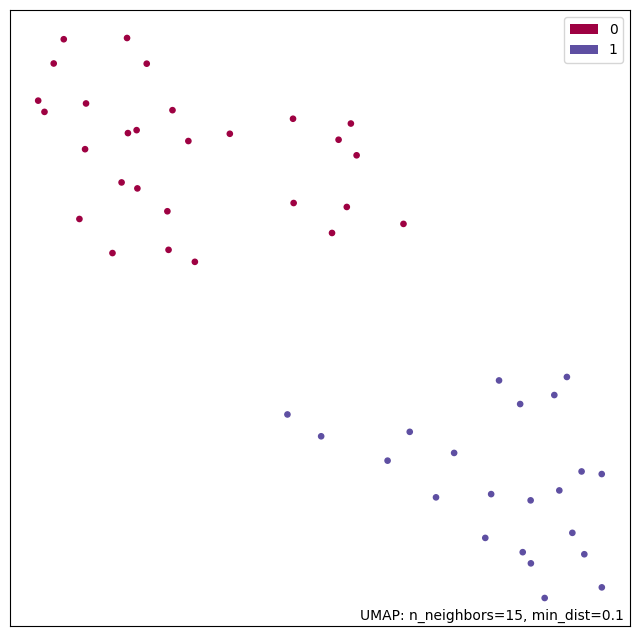

In [255]:
import umap
import umap.plot

# n_neighbors
# min_dist
# n_components
# metric

mapper = umap.UMAP().fit(reduced_features) #n_neighbors=7
umap.plot.points(mapper, labels=labels)

In [256]:
model_selectkfeatures = SelectKBest(f_classif, k=n_out_features).fit(features, labels)

In [257]:
model_selectkfeatures.get_feature_names_out()

array(['cg04730443_MAGEB6', 'cg10127415_MAGEB6', 'cg21039523_BEX4',
       'cg26965953_IRS4', 'cg00086243_TNFRSF18', 'cg00746981_HDGF',
       'cg00746981_HDGF', 'cg02930200_DNALI1', 'cg03136646_MMP23A',
       'cg03136646_MMP23B', 'cg03337482_PRDM16', 'cg03970567_ATF3',
       'cg05068146_ESPN', 'cg07230107_CNIH3', 'cg07230107_CNIH3',
       'cg07817883_TMEM39B', 'cg07817883_TMEM39B', 'cg08122545_HES4',
       'cg08269653_FAM5B', 'cg08700651_IL28RA', 'cg08716655_PDE4B',
       'cg10776230_KIF26B', 'cg11816923_PTPN14', 'cg17172851_PAX7',
       'cg17220055_HIVEP3', 'cg18592459_GREM2', 'cg19180828_RNF207',
       'cg20156382_LOC284632', 'cg21416600_PAX7', 'cg25593625_MYOM3',
       'cg26661034_PAX7', 'cg26824678_CAPZB', 'cg01396143_TANC1',
       'cg02893453_SIX2', 'cg05853130_THSD7B', 'cg14789259_FAM84A',
       'cg19927457_FSHR', 'cg20215622_ERBB4', 'cg20825022_CNTNAP5',
       'cg21158027_SESTD1', 'cg24441922_ARL4C', 'cg24441922_ARL4C',
       'cg01102073_GATA2', 'cg02915437_BFSP2', 

In [258]:
model_selectkfeatures.feature_names_in_, len(model_selectkfeatures.feature_names_in_)

(array(['cg00035864_TTTY18', 'cg00050873_TSPY4', 'cg00050873_FAM197Y2',
        ..., 'ch.22.757911F_XRCC6', 'ch.22.772318F_NAGA',
        'ch.22.909671F_ATXN10'], dtype=object),
 461274)

In [259]:
model_selectkfeatures.scores_, len(model_selectkfeatures.scores_)

(array([0.84626623, 1.60119656, 1.60119656, ..., 6.08496786, 0.50091734,
        3.85857363]),
 461274)

In [260]:
from sklearn.model_selection import train_test_split

n_out_features = 500
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)

In [272]:
lsvc = LinearSVC(C=1.0, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
reduced_features = model.transform(X_test)
reduced_features.shape

/scratch/users/anup/miniconda3/envs/nanosampler/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/scratch/users/anup/miniconda3/envs/nanosampler/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(25, 32)

<Axes: >

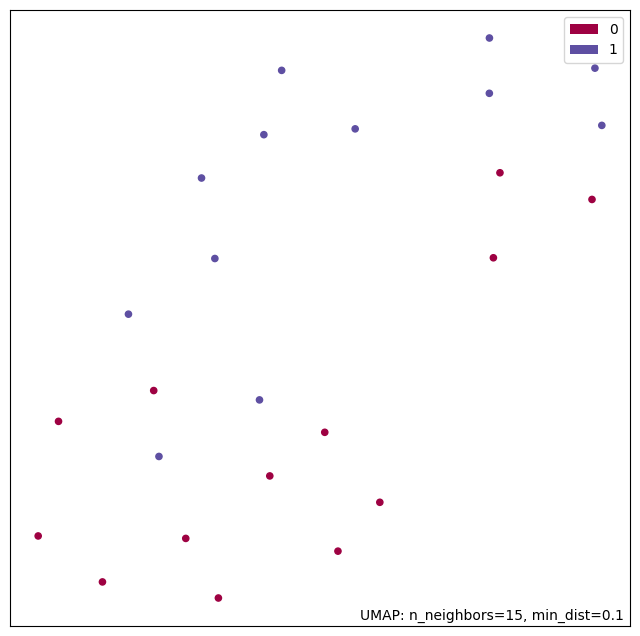

In [275]:
mapper = umap.UMAP(n_neighbors=15).fit(reduced_features) #n_neighbors=7
umap.plot.points(mapper, labels=y_test)

In [261]:
model_selectkfeatures_train = SelectKBest(f_classif, k=n_out_features).fit(X_train, y_train)
model_selectkfeatures_train.get_feature_names_out()

array(['cg03212133_MMGT1', 'cg25525572_ESX1', 'cg26965953_IRS4',
       'cg00086243_TNFRSF18', 'cg00746981_HDGF', 'cg00746981_HDGF',
       'cg00786406_HIPK1', 'cg00903998_ESRRG', 'cg00903998_ESRRG',
       'cg00916635_PTPN22', 'cg00916635_PTPN22', 'cg01468656_HTR6',
       'cg01485998_VASH2', 'cg01485998_VASH2', 'cg02930200_DNALI1',
       'cg03136646_MMP23A', 'cg03136646_MMP23B', 'cg04010586_FAM176B',
       'cg04246763_LOC339524', 'cg05068146_ESPN', 'cg06161375_TRIM63',
       'cg07231649_VPS45', 'cg07231649_VPS45', 'cg07309943_ERO1LB',
       'cg07562458_WDR26', 'cg08269653_FAM5B', 'cg08700651_IL28RA',
       'cg11816923_PTPN14', 'cg12299829_NIPAL3', 'cg12299829_NIPAL3',
       'cg13976045_SLC30A1', 'cg14128890_FAM176B', 'cg14520600_MTR',
       'cg15827003_GNB1', 'cg15949277_ZC3H12A', 'cg16091981_PADI4',
       'cg16717690_UBE2J2', 'cg17278771_RFX5', 'cg17801256_ZMYM4',
       'cg20156382_LOC284632', 'cg21206397_CDC14A', 'cg21295838_PADI4',
       'cg21295838_PADI4', 'cg21961707_S

In [262]:
test_transformed_features = model_selectkfeatures_train.transform(X_test)
test_transformed_features.shape

(25, 500)

In [263]:
scores = -np.log10(model_selectkfeatures_train.pvalues_)
scores /= scores.max()
scores, len(scores)

(array([0.10274515, 0.05610367, 0.05610367, ..., 0.1828561 , 0.04830012,
        0.17035089]),
 461274)

In [291]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

clf = make_pipeline(MinMaxScaler(), LinearSVC(dual="auto"))
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)

Classification accuracy without selecting features: 0.800


In [292]:
clf_selected = make_pipeline(
    SelectKBest(f_classif, k=n_out_features), MinMaxScaler(), LinearSVC(dual="auto")
)
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

Classification accuracy after univariate feature selection: 0.880


In [293]:
y_pred = clf_selected.predict(X_test)
y_pred.shape

(25,)

In [294]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [295]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[13,  0],
       [ 3,  9]])

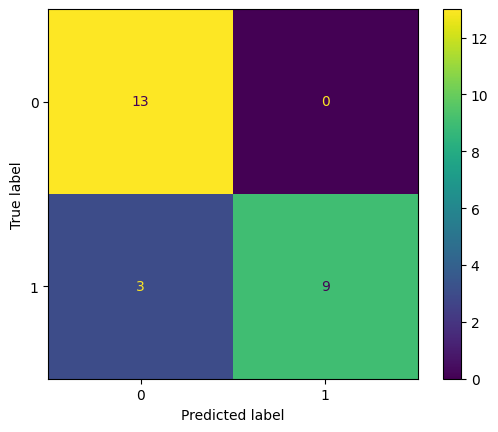

In [296]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_selected.classes_)
disp.plot()

<Axes: >

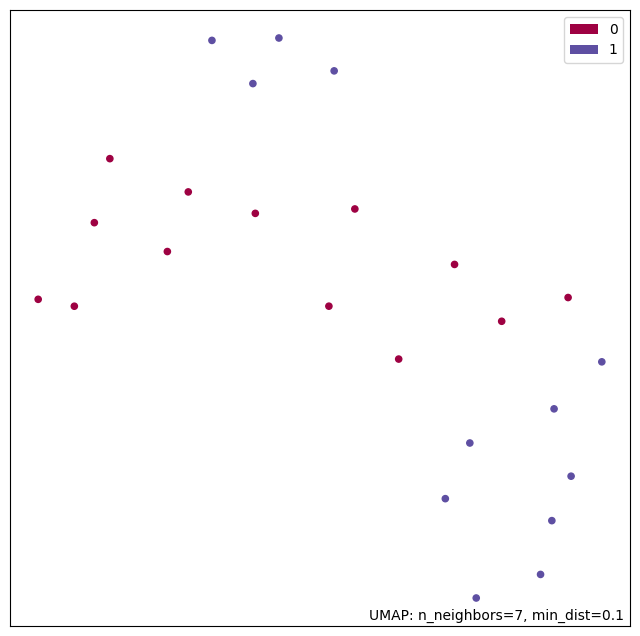

In [297]:
mapper = umap.UMAP(n_neighbors=7).fit(test_transformed_features) #n_neighbors=7
umap.plot.points(mapper, labels=y_test)